In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random

import h5py

In [42]:
%matplotlib notebook

In [43]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *

In [44]:
%reload_ext autoreload
%autoreload 2

In [45]:
from likelihood_calculator import likelihood_analyser
from likelihood_calculator import GravityFramework
gfw = GravityFramework.GravityFramework()

### Load data

In [46]:
foldername = r'/data/new_trap/20191223/Bead1/Discharge/'
bdf_discharge = load_dir(dirname=foldername)

71  files in folder
71  files loaded


In [47]:
bb = bdf_discharge[0]
response_x = [np.std(bb.response_at_freq('x',drive_freq=43)) for bb in bdf_discharge]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


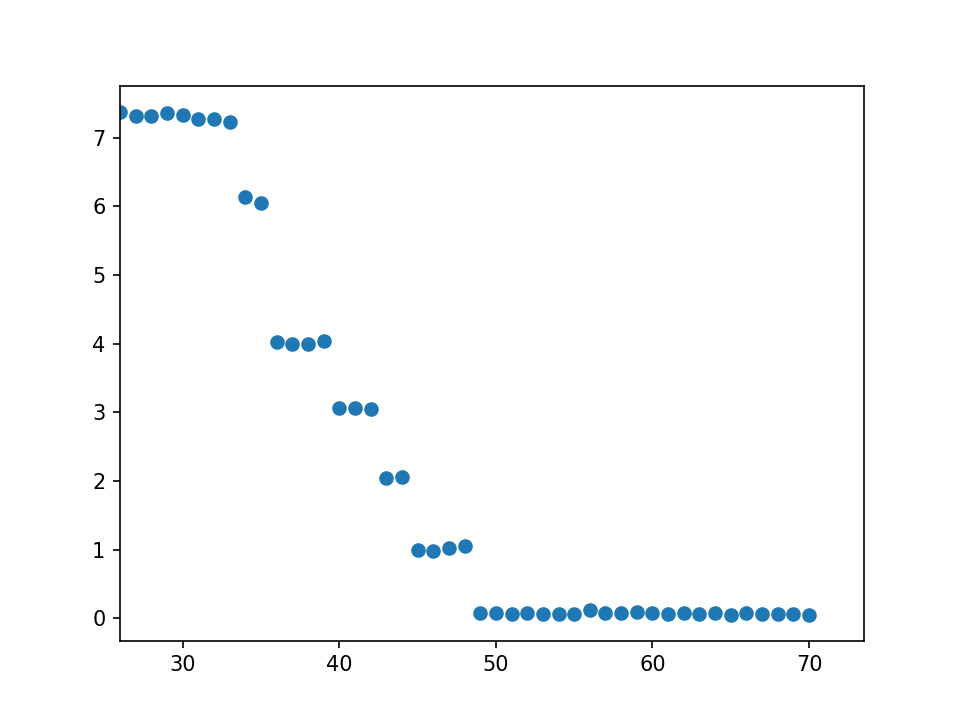

[(26, 73.50665322580646)]

In [48]:
_, ax = plt.subplots()
ax.scatter(range(len(response_x)), response_x/response_x[37]*4)
ax.set(xlim=(26,None))

In [49]:
bdf_x = bdf_discharge[36:40]
charges = 4
m1s = gfw.build_x_response(bdf_x, drive_freq=43,charges=charges)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


***************************************************
X2-amplitude:  1.56e+01
reduced chi2:  0.1418212009315822
***************************************************
X2-amplitude:  1.56e+01
reduced chi2:  0.1302723479756416
***************************************************
X2-amplitude:  1.56e+01
reduced chi2:  0.1153588705602852
***************************************************
X2-amplitude:  1.58e+01
reduced chi2:  0.16632488724712097
X3 to X2 ratio: 0.1948267171090201
X2 response (amplitude): 15.62983695433569


In [91]:
foldername = r'/data/new_trap/20191223/Bead1/Shaking/'
datasets_num = 20
gfw.BDFs = load_dir(foldername,file_prefix='Scan13',max_file=datasets_num)
# gfw.BDFs = bdf_x

20  files in folder
20  files loaded


<IPython.core.display.Javascript object>


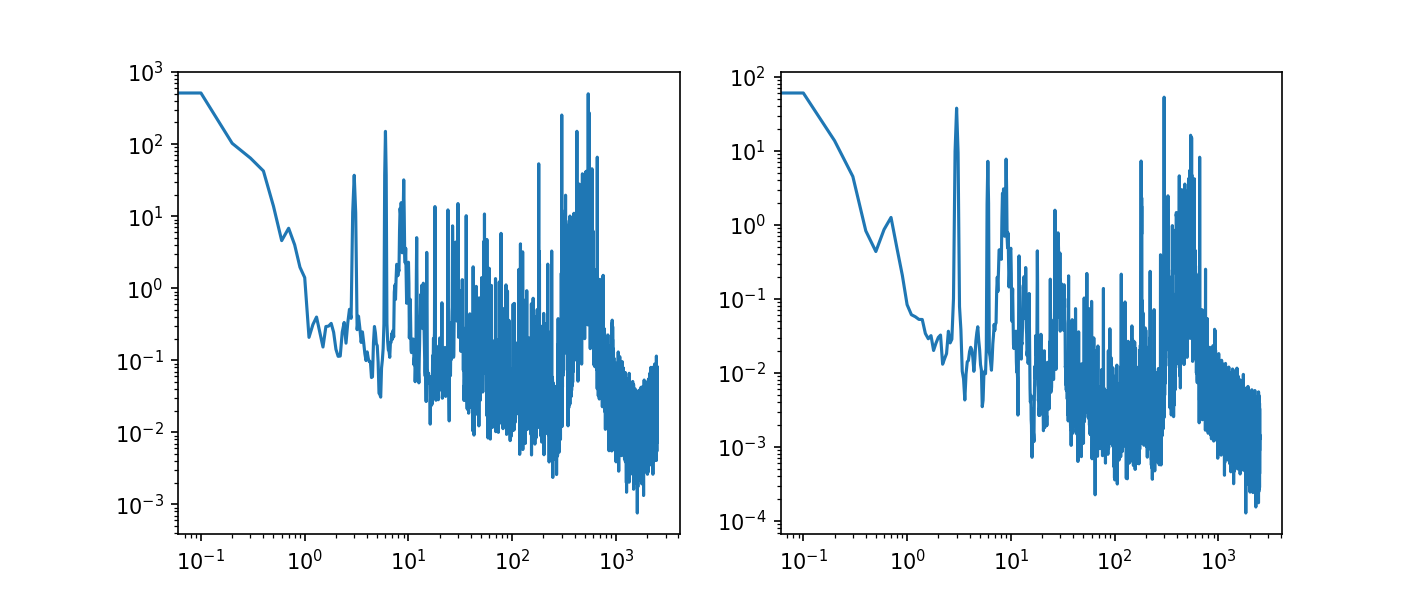

In [92]:
gfw.plot_dataset(bdf_i=2)

In [93]:
gfw.build_noise_array(sideband_freq=43, bandwidth=1)

x2 noise rms:  0.32977575589334523
x3 noise rms:  0.08068240124168115


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [94]:
freq=3
# gfw.build_noise_array(sideband_freq=freq*4+2)
tmp_amp3, m1s_3 = gfw.build_harmonics_array(freq=24)

0 / 20


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


***************************************************
X2-amplitude:  5.64e-01
reduced chi2:  12.678760123696147
1 / 20
***************************************************
X2-amplitude:  9.99e-01
reduced chi2:  26.905669698448044
2 / 20
***************************************************
X2-amplitude:  1.59e+00
reduced chi2:  12.885351061312402
3 / 20
***************************************************
X2-amplitude:  1.24e+00
reduced chi2:  7.2150668845793895
4 / 20
***************************************************
X2-amplitude:  1.28e+00
reduced chi2:  1.1446663027427357
5 / 20
***************************************************
X2-amplitude:  2.02e+00
reduced chi2:  32.893199978906985
6 / 20
***************************************************
X2-amplitude:  1.97e+00
reduced chi2:  1.7481416965481582
7 / 20
***************************************************
X2-amplitude:  1.35e+00
reduced chi2:  18.602563494295147
8 / 20
***************************************************
X2-amplitude

<IPython.core.display.Javascript object>


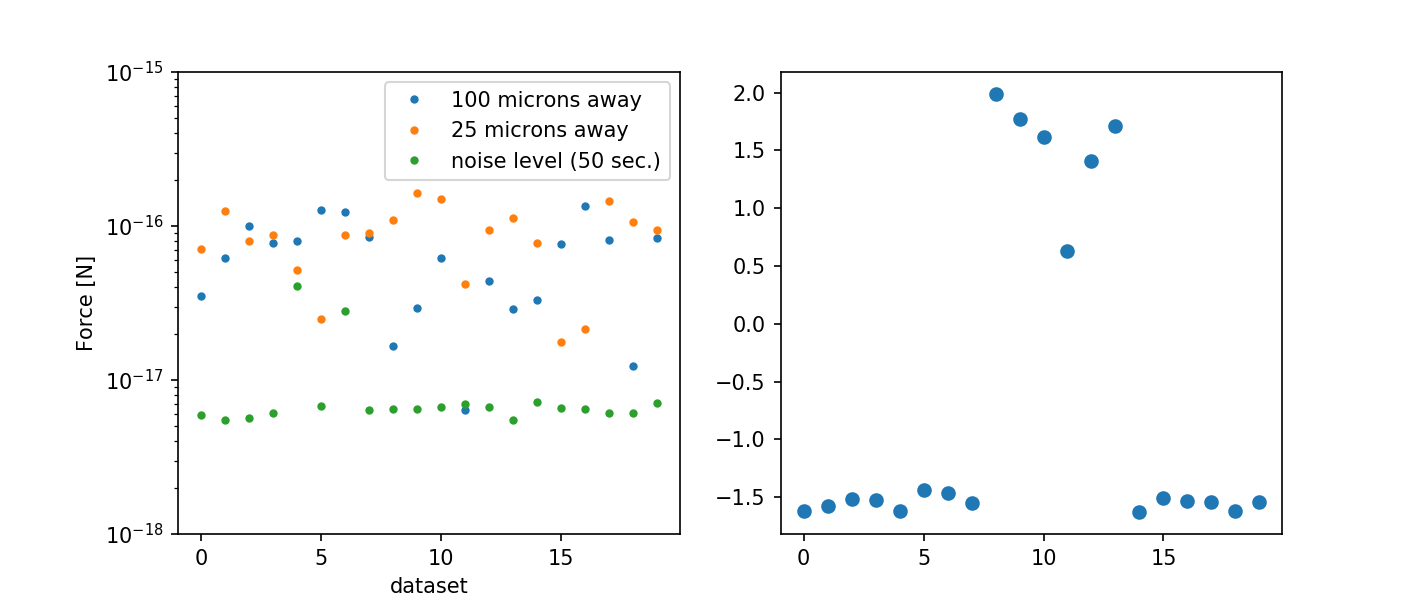

In [96]:
_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].semilogy(range(20),(tmp_amp3/gfw.scale_X2),'.', label='100 microns away')
ax[0].semilogy(range(20),(tmp_amp4/gfw.scale_X2),'.', label='25 microns away')
ax[0].semilogy(range(20),gfw.noise_list_x2/gfw.scale_X2/np.sqrt(5),'.', label='noise level (50 sec.)')
ax[0].set(ylim=(1e-18,1e-15), ylabel='Force [N]', xlabel='dataset')
ax[0].legend()
phases = [m1_.values[4] for m1_ in m1s_3]
ax[1].scatter(range(20), phases)

In [30]:
fit_kwargs = {'alpha': 0.6, 'phase': 0, 'error_alpha': 0.1, 'error_phase': 10,
              'errordef': 1,
              'limit_alpha': [0, 1000], 'limit_phase': [-500,500],
              'fix_alpha': False, 'fix_phase': False, 'print_level': 0}
gfw.build_noise_array(sideband_freq=14, bandwidth=2)
mm_17 = [gfw.get_alpha(bdf=gfw.BDFs[i],center_freq=12, bandwidth=2, separation=4.5e-6, 
              lambda_par=100e-6, stroke=50e-6,**fit_kwargs)[0] for i in range(datasets_num)]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


x2 noise rms:  4.805100542768555
x3 noise rms:  1.0385956161911387
Your choice of separation or height is not existing
Taking 4.5e-06 for separation
Taking 8.5e-21 for height
A separation of 4.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  1.71e+02
reduced chi2:  94.50617701956413
Your choice of separation or height is not existing
Taking 4.5e-06 for separation
Taking 8.5e-21 for height
A separation of 4.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  2.04e+01
reduced chi2:  131.2936896839364
Your choice of separation or height is not existing
Taking 4.5e-06 for separation
Taking 8.5e-21 for height
A separation of 4.50e-06 is selected
A height of 8.47e-21 is selected
***************************************************
alpha:  8.54e+00
reduced chi2:  30.121635591521425
Your choice of separation or height is not existing
Taking 4.5e-06 for separation
Taking 8.5

<IPython.core.display.Javascript object>


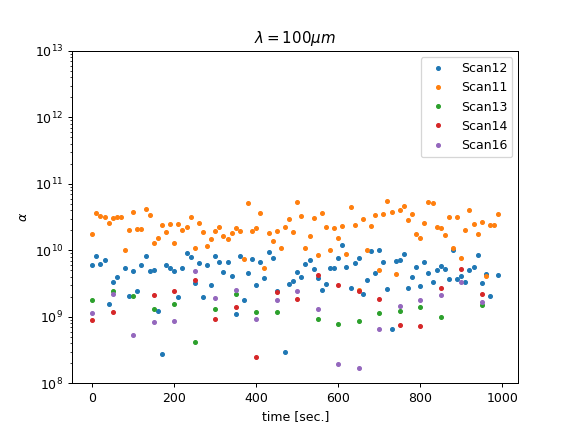

0.4907060846792755


In [212]:
_, ax = plt.subplots()
ax.semilogy(np.arange(100)*10, np.array(mm_12)*1e10, '.', label='Scan12')
ax.semilogy(np.arange(100)*10, np.array(mm_11)*1e10, '.', label='Scan11')
ax.semilogy(np.arange(20)*50, np.array(mm_13)*1e10, '.', label='Scan13')
ax.semilogy(np.arange(20)*50, np.array(mm_14)*1e10, '.', label='Scan14')
ax.semilogy(np.arange(20)*50, np.array(mm_16)*1e10, '.', label='Scan16')
ax.set(ylim=(1e8,1e13), xlabel='time [sec.]', ylabel=r'$\alpha$', title=r'$\lambda=100 \mu m $')
ax.legend()
print(np.mean(mm))

In [213]:
samples = np.array(mm_16)
print('C.I. ', bs.bootstrap(samples, stat_func=bs_stats.mean, num_iterations=100, alpha=0.05, is_pivotal=False))

C.I.  0.16432320804196515    (0.12317361010822703, 0.20558286241350332)


In [23]:
#old
samples = np.array(mm)
print('C.I. ', bs.bootstrap(samples, stat_func=bs_stats.mean, num_iterations=10000, alpha=0.05, is_pivotal=False))

C.I.  0.7349983605836174    (0.7021973397773251, 0.7698897276151877)
